In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
data = pd.read_csv('/content/gdrive/MyDrive/forest_dataset.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [5]:
labels = data[data.columns[-1]].values #классы
feature_matrix = data[data.columns[:-1]].values #признаки

In [5]:
#поиск пропущенных значений
values = []
for column in data.columns:
  x = data[column].isna().sum() #sum(data[column] == np.nan)
  values.append(str(x))
table_nan = pd.DataFrame([values], columns = data.columns)

print(table_nan)

if data.isna().values.any(): #при обнаружении пропущенных значений заполнить их нулями, в данном случае не запускается
    data = data.fillna(0)
        
if data.isna().values.any():
    print('Остались NaN')

#пропущенных значений не обнаружено

   0  1  2  3  4  5  6  7  8  9 10 11 12  ... 42 43 44 45 46 47 48 49 50 51 52 53 54
0  0  0  0  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0  0  0  0

[1 rows x 55 columns]


In [6]:
num_cols = []
for i in range(10):
  num_cols.append(str(i))

cat_cols = []
for i in range(10,55):
  cat_cols.append(str(i))

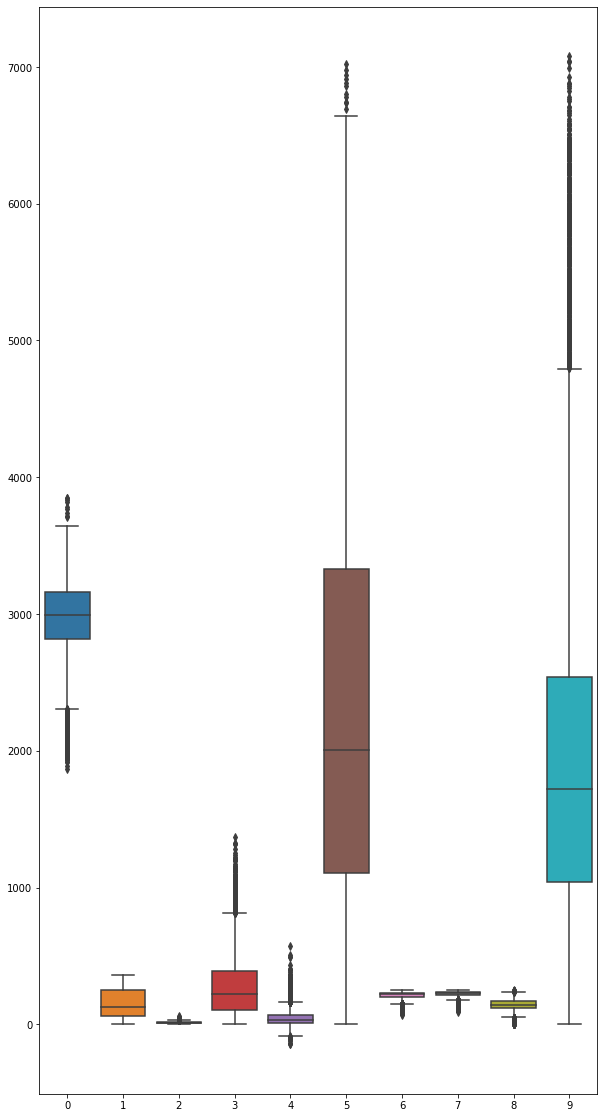

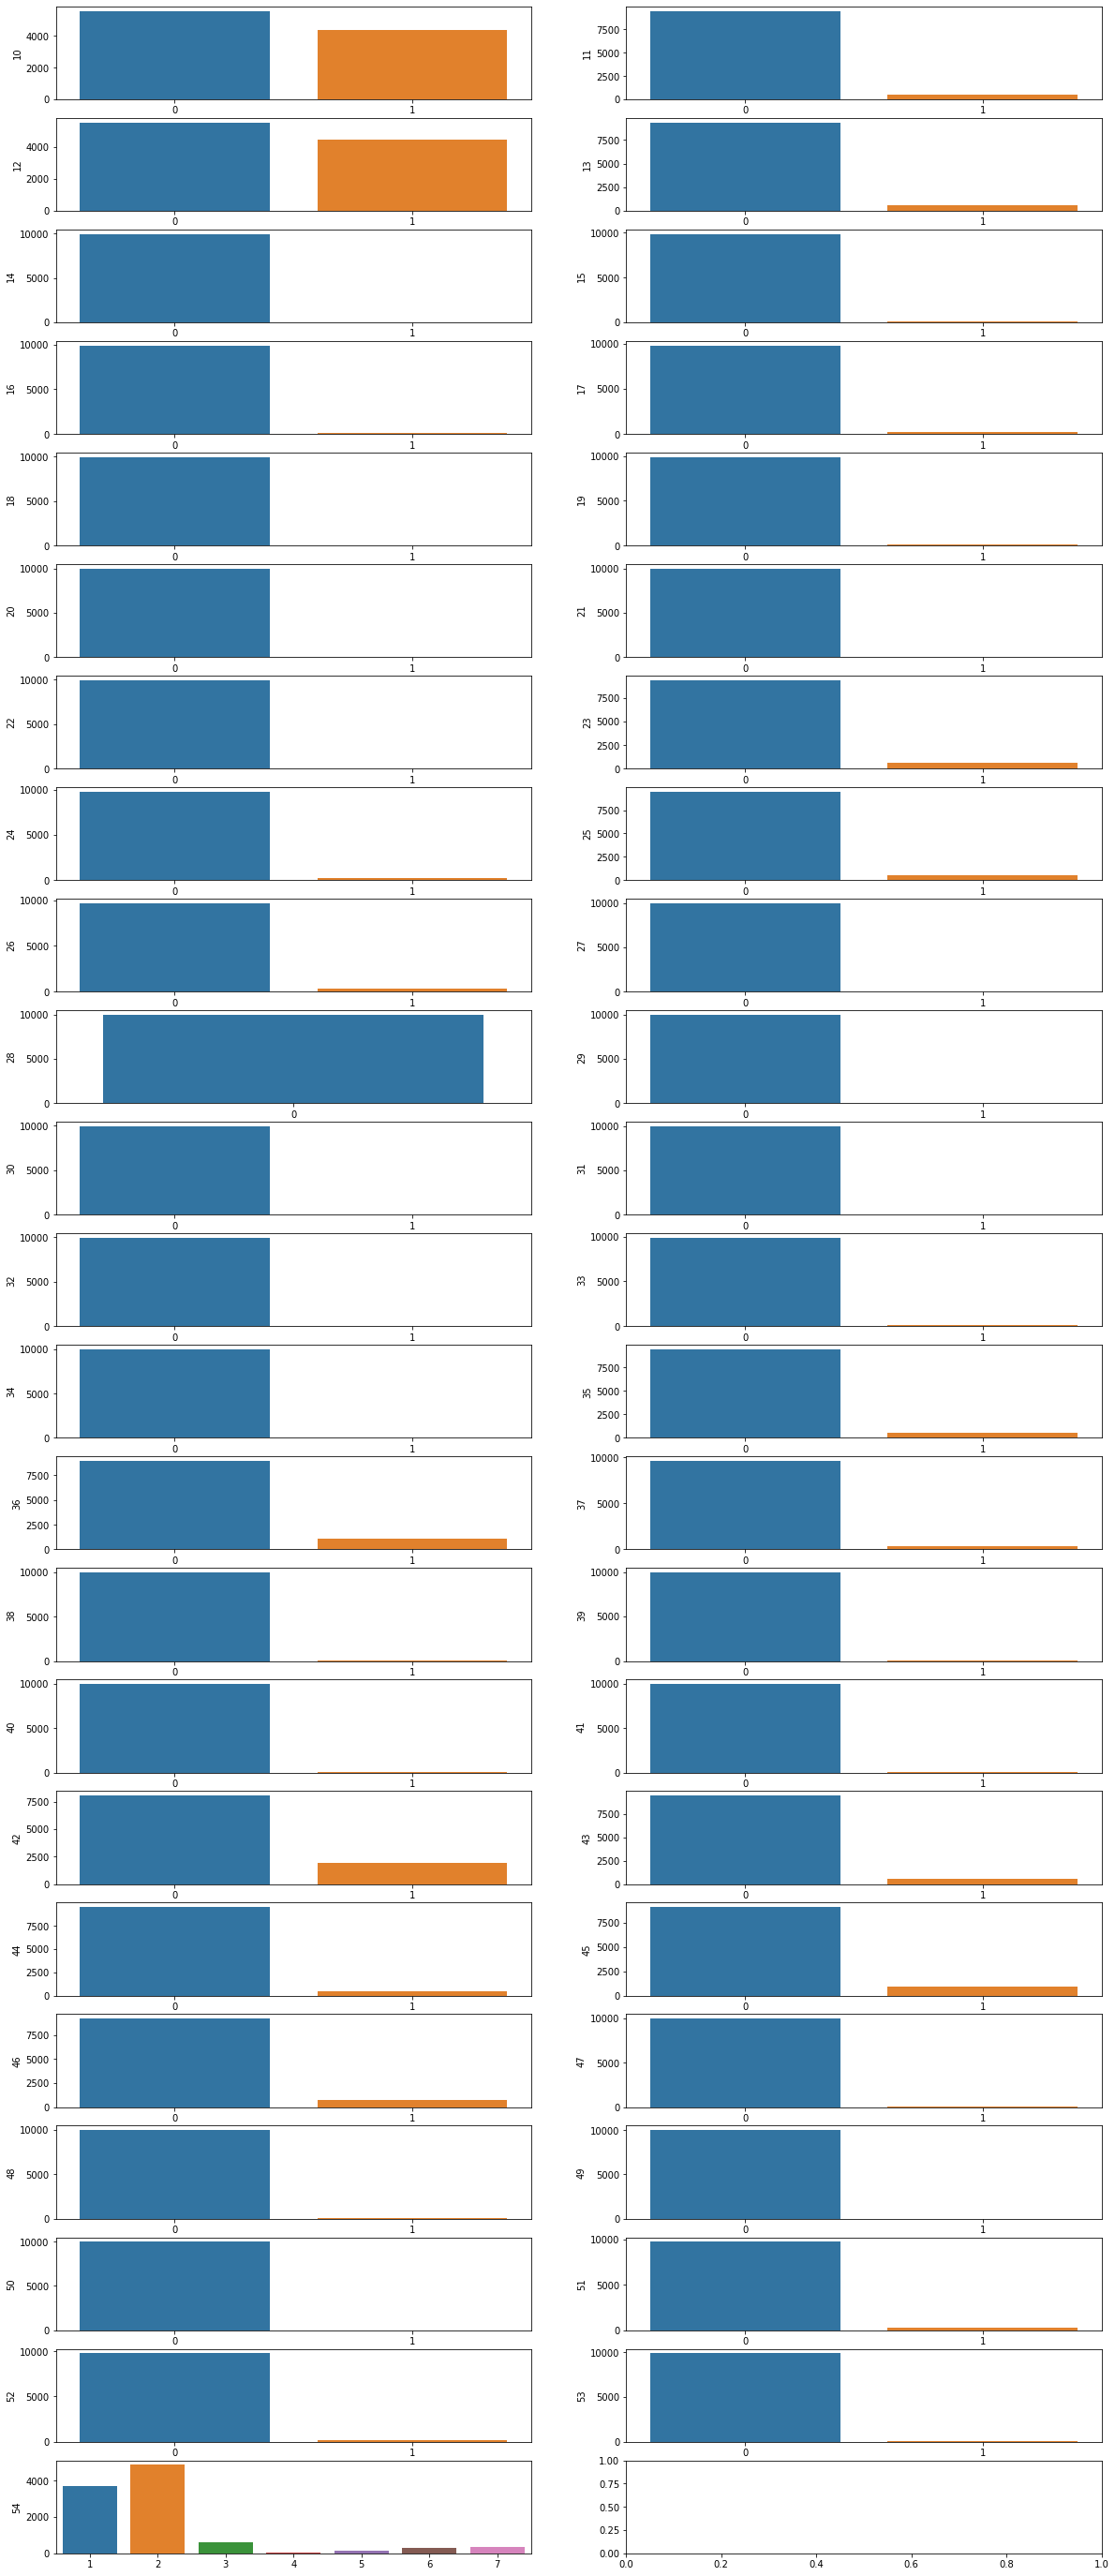

In [7]:
#анализ данных

import seaborn as sns

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(20)
sns.boxplot(data=data[num_cols])
fig, axes = plt.subplots(23, 2, figsize=(20, 50))
i = 0
j = 0
for column in cat_cols:
    x1 = data[column].value_counts()
    new = sns.barplot(ax=axes[i, j], x=x1.index, y=x1)
    j += 1
    if j == 2:
        i += 1
        j = 0
#распределение целевой переменной - последний график

In [20]:
def classifyKNN (trainData, testData, k, numberOfClasses):
    #Euclidean distance between 2-dimensional point
    def dist (a, b):
      res = 0
      for i in range(54):
        res += (int(a[i]) - int(b[i]))**2
      return math.sqrt(res)
    testLabels = []
    for j, testPoint in testData.iterrows():
        #Claculate distances between test point and all of the train points
        testDist = []
        for i, row in trainData.iterrows():
          testDist.append([dist(testPoint, row), row[54]])
        #How many points of each class among nearest K
        stat = [0 for i in range(numberOfClasses)]
        for d in sorted(testDist)[0:k]:
            #print(d)
            stat[d[1]-1] += 1/(d[0]+0.0000001)
        #Assign a class with the most number of occurences among K nearest neighbours
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    print(testLabels)
    return testLabels

In [63]:
train, test = train_test_split(data, test_size= 0.7)
train, test = train_test_split(train, test_size= 0.3)
len(train)

2100

In [64]:
testDataLabels = classifyKNN (train, test, 3, 7)

[1, 2, 1, 1, 0, 4, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 5, 0, 0, 6, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 5, 1, 0, 6, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 6, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 5, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 5, 1, 5, 0, 5, 1, 1, 1, 0, 0, 1, 5, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 6, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 6, 2, 5, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 5, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 6, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 4, 5, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 4, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 4, 1, 0, 0, 4, 6, 0, 5, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 

In [65]:
testData = test
print('RESULTS:')
sum_ = 0
j = 0
for i, row in testData.iterrows():
  sum_ += int((testDataLabels[j]+1)==row[54])
  j += 1
sum_ /= float(len(testData))
print('Accuracy: ', sum_ )

RESULTS:
Accuracy:  0.6844444444444444


In [30]:
train, test = train_test_split(data, test_size= 0.7)
train, test = train_test_split(train, test_size= 0.3)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

optimal_clf = KNeighborsClassifier(n_neighbors = 3, weights='distance')
optimal_clf.fit(train.iloc[:, :-1], train.iloc[:,-1])
pred_prob = optimal_clf.predict(test.iloc[:, :-1])

In [26]:
accuracy_score(test.iloc[:,-1],pred_prob)

0.66

In [66]:
#Байесовский классификатор

from __future__ import division
from collections import defaultdict
from math import log

def btrain(feats, labels):
    classes, freq = defaultdict(lambda:0), defaultdict(lambda:0)
    for i, testPoint in feats.iterrows():
      i_feat = testPoint
      i_label = labels[i]
      classes[i_label] += 1                 # count classes frequencies
      for i_i_feat in i_feat:
        freq[i_label, i_i_feat] += 1          # count features frequencies
    for label, feat in freq:                # normalize features frequencies
        freq[label, feat] /= classes[label]
    for c in classes:                       # normalize classes frequencies
        classes[c] /= len(labels)

    return classes, freq                    # return P(C) and P(O|C)

def bclassify(classifier, feats):
    classes, prob = classifier
    return min(classes.keys(),              # calculate argmin(-log(C|O))
        key = lambda cl: -log(classes[cl]) + \
            sum(-log(prob.get((cl,feat), 10**(-7))) for feat in feats))

In [68]:
#classifier = btrain(pd.DataFrame(data=train.iloc[:, :-1]))
classifier = btrain(train.iloc[:, :-1], train.iloc[:,-1])

preds = []
testX = test.iloc[:, :-1]
for i, testPoint in testX.iterrows():
  preds.append(bclassify(classifier, testPoint))

In [69]:
accuracy_score(test.iloc[:,-1], preds)

0.4866666666666667

In [70]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(train.iloc[:, :-1], train.iloc[:,-1])
predicted = model.predict(testX)
accuracy_score(test.iloc[:,-1], predicted)

0.3988888888888889